In [ ]:
import sys
sys.path.append("../..")

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import solutions, YOLO

from src.config.path import SEGMENTATION_YOLO_PATH
from src.capture.capture import CameraFrameCapture


0: 480x640 1 person, 42.1ms
Speed: 1.3ms preprocess, 42.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


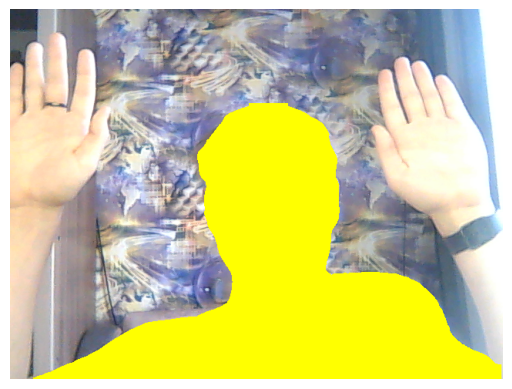

In [ ]:
model = YOLO(SEGMENTATION_YOLO_PATH)

with CameraFrameCapture() as cap:
    frame = cap.read()
    results = model.predict(frame, classes=[0])

    for result in results:
        for mask in result.masks.xy:
            points = np.int32([mask])
            cv2.fillPoly(frame, points, color=(255, 255, 0))

    plt.imshow(frame)
    plt.axis('off')
    plt.show()

Ultralytics Solutions:  {'source': None, 'model': '../../../src/nn/weights/segmentation/yolo11n-seg.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': None, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': False, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
0: 480x640 6.7ms, 1 person
Speed: 78.8ms track, 6.7ms solution per image at shape (1, 3, 480, 640)



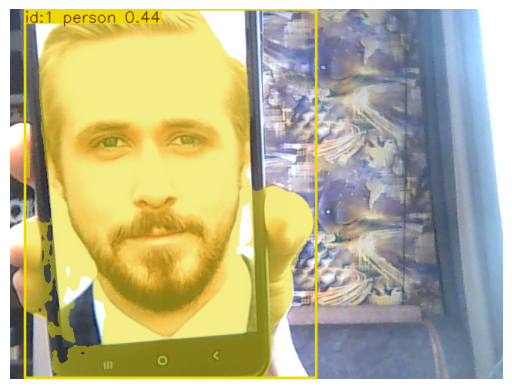

In [ ]:
isegment = solutions.InstanceSegmentation(
    model=SEGMENTATION_YOLO_PATH,
    classes=[0]
)

with CameraFrameCapture() as cap:
    frame = cap.read()
    results = isegment(frame)

    plt.imshow(results.plot_im)
    plt.axis('off')
    plt.show()